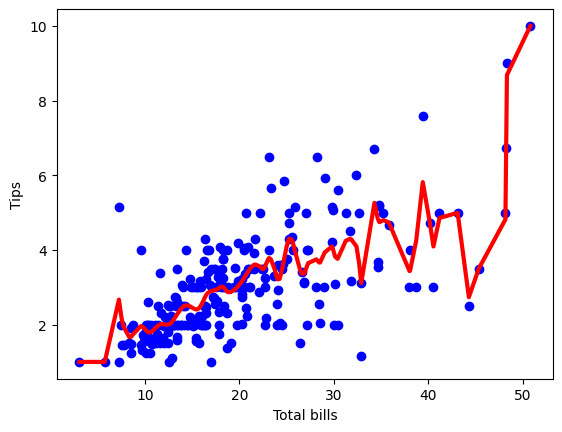

In [4]:
import pandas as pd
import numpy as np

# define features and labels
df = pd.read_csv('tips.csv')
features = df['total_bill'].values
labels = df['tip'].values

# define kernel function
def kernel(data, point, k):
    diff = point - data
    ws = np.exp(np.sum(diff ** 2, axis=1) / (-2.0 * k ** 2))
    return np.diag(ws)

# define local_weight function
def local_weight(data, point, xmat, ymat, k):
    wei = kernel(data, point, k)
    return np.linalg.inv(data.T @ wei @ data) @ (data.T @ wei @ ymat.T)

# define local_weight_regression function
def local_weight_regression(xmat, ymat, k):
    ypred = np.array([xmat[i] @ local_weight(xmat, xmat[i], xmat, ymat, k) for i in range(len(xmat))])
    return ypred

# prepare data
data = np.column_stack([np.ones_like(features), features])
indices = np.argsort(data[:, 1])
xsort = data[indices, 1]

# apply local weight regression
ypred = local_weight_regression(data, labels, 0.5)

import matplotlib.pyplot as plt

# plot
plt.scatter(features, labels, color='blue')
plt.plot(xsort, ypred[indices], color='red', linewidth=3)
plt.xlabel('Total bills')
plt.ylabel('Tips')
plt.show()
